In [77]:
import pandas as pd
from IPython.display import display

In [78]:
ion = pd.read_csv(r"C:\Users\suyog\DeepLearning\dataset\ion.csv")

In [79]:
pd.set_option('display.max_columns', None)

In [80]:
display(ion.head())

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [81]:
df = ion.copy()
df['Class'] = df['Class'].map({'good':0, 'bad':1})

In [82]:
df_train = df.sample(frac=0.7, random_state=0) #To randomly select 70% rows
df_valid = df.drop(df_train.index) #To select the remaining 30% of data

In [83]:
max_ = df_train.max(axis=0) #compute the max value for each column
min_ = df_train.min(axis=0) #compute the min value for each column

In [84]:
df_train = (df_train - min_) / (max_ - min_) #Scaling by calculation
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

In [85]:
X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

In [86]:
from tensorflow import keras 
from tensorflow.keras import layers

In [87]:
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[34]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [88]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [89]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [90]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
)

<Axes: >

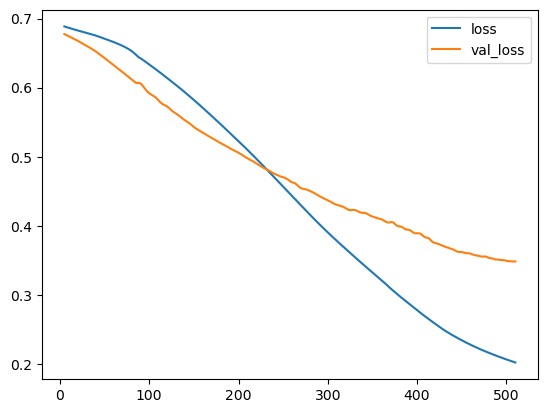

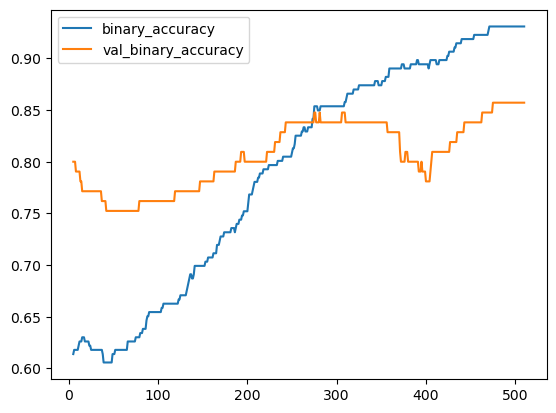

In [91]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:,['loss','val_loss']].plot()
history_df.loc[5:,['binary_accuracy','val_binary_accuracy']].plot()

In [92]:
print(("Best Validation Loss: {:0.4f}" +\
       "\nBest Validation Accuracy: {:0.4f}")\
       .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max())
      )

Best Validation Loss: 0.3487
Best Validation Accuracy: 0.8571
